In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
# import master dataframe
file = '../output/master_no_grouping.csv'
df = pd.read_csv(file)
df.head()

,Unnamed: 0,Trip ID,time,summary,precipIntensity,precipProbability,temperature,apparentTemperature,windSpeed,icon,...,Pickup Community Area,Fare,Tips,Tolls,Extras,Trip Total,Payment Type,Pickup Centroid Latitude,Pickup Centroid Longitude,day
0,0,bc6f08423e9f194cb63a0d5ec6c6a2dea001e914,01:45:00,Partly Cloudy,0.0000,0.00,43.39,40.05,5.59,partly-cloudy-night,...,8.0,7.05,0.00,0.0,1.0,8.05,Cash,41.907413,-87.640902,2013-11-16
1,1,b2e0ede2b0d907551beda4e8b4b83c143010f63d,04:45:00,Overcast,0.0005,0.14,53.40,53.40,1.25,cloudy,...,32.0,6.75,2.00,0.0,0.0,8.75,Credit Card,41.880994,-87.632746,2016-09-28
2,2,c2155aedc41a27673cd498d0fea754a18132d7f9,07:15:00,Mostly Cloudy,0.0000,0.00,7.20,-4.92,7.53,partly-cloudy-day,...,28.0,8.44,0.00,0.0,0.0,8.44,Cash,41.879255,-87.642649,2013-12-10
3,3,c1e860354f05150021e1bdeb7696314ca3e15608,09:00:00,Clear,0.0000,0.00,5.96,-5.93,7.04,clear-day,...,8.0,39.25,8.45,0.0,3.0,50.70,Credit Card,41.902788,-87.626146,2014-02-27
4,4,bdff93a935333338e6f2f04f778ad7713a36c9ad,04:15:00,Clear,0.0000,0.00,43.05,43.05,1.80,clear-night,...,32.0,11.00,2.00,0.0,0.0,13.50,Credit Card,41.878866,-87.625192,2016-10-31


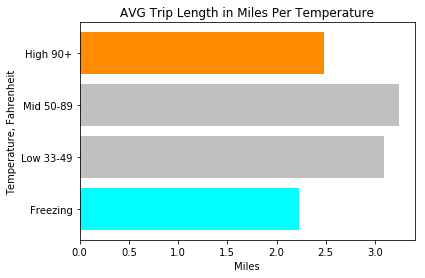

In [3]:
# combine icons so there are less weather categories
df.loc[:, 'icon'].replace(['clear-night', 'fog', 'partly-cloudy-day'], ['clear-day', 'cloudy', 'partly-cloudy-night'], inplace=True)
df.loc[:, 'icon'].replace(['clear-day', 'cloudy', 'partly-cloudy-night'], ['clear','cloudy', 'partly cloudy'], inplace=True)

# make a copy of master dataframe
df1 = df.copy()

# create new column to hold temp range
df1["temp range"] = ""

# compare apparentTemperature value to temp category values and place them in the newly created 'temp range' column
(df1.loc[df1['apparentTemperature'] > 89, ['temp range']]) = 'High 90+'
(df1.loc[(90 > df1['apparentTemperature']) & (df1['temperature'] > 49), ['temp range']]) = 'Mid 50-89'
(df1.loc[(50 > df1['apparentTemperature']) & (df1['temperature']> 32), ['temp range']]) = 'Low 33-49'
(df1.loc[df1['apparentTemperature'] < 33, ['temp range']]) = 'Freezing'

# group by 'temp range' and aggreagte appropriate columns
df1 = df1.groupby(['temp range']).agg({'Trip ID': 'count', 'precipIntensity': 'mean', 'precipProbability': 'mean', 'temperature': 'mean', 'apparentTemperature': 'mean', 'windSpeed': 'mean', 'Trip Seconds': 'mean', 'Trip Miles': 'mean', 'Fare': 'mean', 'Trip Total': 'mean'})
df1.head

# here I couldn't figure out how to rearrange the rows so I exported to .csv and manually did it
file = '../output/groupby_high_mid_low_freezing.csv'
df1 = pd.read_csv(file)
df1.head

# create variables for average miles per temperature category
high_miles = df1['Trip Miles'][0]
mid_miles = df1['Trip Miles'][1]
low_miles = df1['Trip Miles'][2]
freezing_miles = df1['Trip Miles'][3]

# create the height of the graph based on average miles
height = [high_miles, mid_miles, low_miles, freezing_miles]

# create variables for temperature categories
high_range = df1['temp range'][0]
mid_range = df1['temp range'][1]
low_range = df1['temp range'][2]
freezing_range = df1['temp range'][3]

bars = (freezing_range, low_range, mid_range, high_range)
y_pos = np.arange(len(bars))
 
# Create horizontal bars
plt.barh(y_pos, height, color=['cyan', 'silver', 'silver', 'darkorange'])
 
# Create names on the y-axis
plt.yticks(y_pos, bars)

# create labels
plt.xlabel('Miles')
plt.ylabel('Temperature, Fahrenheit')
plt.title('AVG Trip Length in Miles Per Temperature')
 
# plt.savefig("../Images/js_miles_per_temp.png", bbox_inches = "tight")    
# show graphic
plt.show()

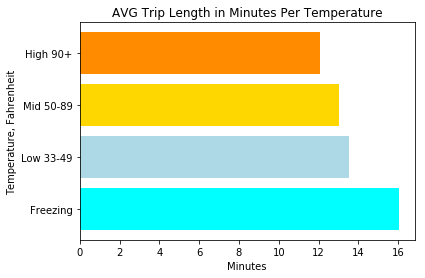

In [4]:
# copy df1 to df2
df2 = df1.copy()

# convert seconds to minutes
df2['Trip Minutes'] = df2['Trip Seconds'] / 60

# create variables for average trip length in minutes per temperature category
high_Minutes = df2['Trip Minutes'][0]
mid_Minutes = df2['Trip Minutes'][1]
low_Minutes = df2['Trip Minutes'][2]
freezing_Minutes = df2['Trip Minutes'][3]

# create the height of the graph based on average miles
height = [high_Minutes, mid_Minutes, low_Minutes, freezing_Minutes]

# create variables for temperature categories
high_range = df2['temp range'][0]
mid_range = df2['temp range'][1]
low_range = df2['temp range'][2]
freezing_range = df2['temp range'][3]

bars = (freezing_range, low_range, mid_range, high_range)
y_pos = np.arange(len(bars))
 
# Create horizontal bars
plt.barh(y_pos, height, color=['cyan', 'lightblue', 'gold', 'darkorange'])
 
# Create names on the y-axis
plt.yticks(y_pos, bars)

# create labels
plt.xlabel('Minutes')
plt.ylabel('Temperature, Fahrenheit')
plt.title('AVG Trip Length in Minutes Per Temperature')
 
# plt.savefig("../Images/js_minutes_per_temp.png", bbox_inches = "tight")   
# Show graphic
plt.show()

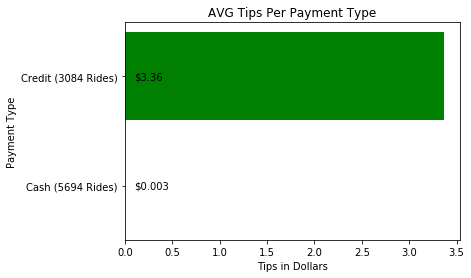

In [5]:
# groupby newly created weather icons
df10 = df.groupby(['Payment Type'], as_index=False).agg({'Tips': 'mean', 'Trip ID': 'count', 'Trip Seconds': 'mean', 'Trip Miles': 'mean', 'Trip Total': 'mean'})
df10.head()

# create variables for average tips per payment type plot
cash_tips = df10['Tips'][0]
credit_tips = df10['Tips'][1]
height = [cash_tips, credit_tips]
bars = ('Cash (5694 Rides)', 'Credit (3084 Rides)')
y_pos = np.arange(len(bars))
 
# create horizontal bars
plt.barh(y_pos, height, color=['green'])
 
# label
plt.ylabel('Payment Type')
plt.yticks(y_pos, bars)
plt.xlabel('Tips in Dollars')
plt.title('AVG Tips Per Payment Type')

# create floating text
plt.text(.1, .97, '${:,.2f}'.format(df10['Tips'][1]))
plt.text(.1, -.025, '${:,.3f}'.format(df10['Tips'][0]))

# plt.savefig("../Images/js_avg_tips_per_ride.png", bbox_inches = "tight")   
# Show graphic
plt.show()

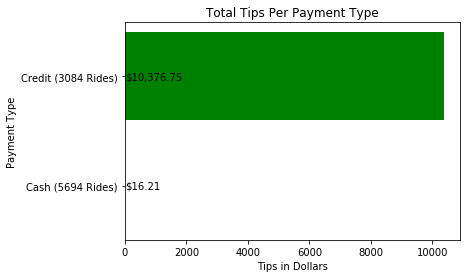

In [6]:
# groupby newly created weather icons
df11 = df.groupby(['Payment Type'], as_index=False).agg({'Tips': 'sum', 'Trip ID': 'count', 'Trip Seconds': 'mean', 'Trip Miles': 'mean', 'Trip Total': 'mean'})
df11.head()

# create variables for average tips per payment type plot
cash_tips = df11['Tips'][0]
credit_tips = df11['Tips'][1]
height = [cash_tips, credit_tips]
bars = ('Cash (5694 Rides)', 'Credit (3084 Rides)')
y_pos = np.arange(len(bars))
 
# create horizontal bars
plt.barh(y_pos, height, color=['green'])
 
# label
plt.ylabel('Payment Type')
plt.yticks(y_pos, bars)
plt.xlabel('Tips in Dollars')
plt.title('Total Tips Per Payment Type')

# create floating text
plt.text(-1, .97, '${:,.2f}'.format(df11['Tips'][1]))
plt.text(-1, -.025, '${:,.2f}'.format(df11['Tips'][0]))

# plt.savefig("../Images/js_total_tips_per_ride.png", bbox_inches = "tight")  
# Show graphic
plt.show()

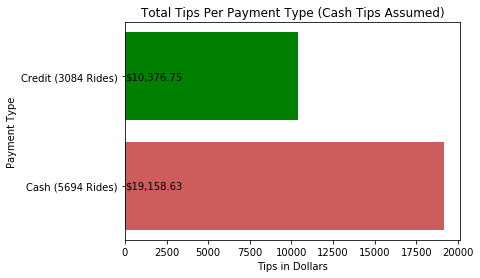

In [7]:
# calculate loss of reported income
income = df10['Trip ID'][0] * df10['Tips'][1]
income

# groupby newly created weather icons
df11 = df.groupby(['Payment Type'], as_index=False).agg({'Tips': 'sum', 'Trip ID': 'count', 'Trip Seconds': 'mean', 'Trip Miles': 'mean', 'Trip Total': 'mean'})
df11.head()

# create variables for average tips per payment type plot
cash_tips = income
credit_tips = df11['Tips'][1]
height = [cash_tips, credit_tips]
bars = ('Cash (5694 Rides)', 'Credit (3084 Rides)')
y_pos = np.arange(len(bars))
 
# create horizontal bars
plt.barh(y_pos, height, color=['indianred', 'green'])
 
# label
plt.ylabel('Payment Type')
plt.yticks(y_pos, bars)
plt.xlabel('Tips in Dollars')
plt.title('Total Tips Per Payment Type (Cash Tips Assumed)')

# create floating text
plt.text(-1, .97, '${:,.2f}'.format(df11['Tips'][1]))
plt.text(-1, -.025, '${:,.2f}'.format(income))
 
# plt.savefig("../Images/js_adjusted_tips_per_ride.png", bbox_inches = "tight")
# Show graphic
plt.show()